In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Representação gráfica da relação entre saneamento básico e mortalidade por tuberculose no Brasil de 2000 à 2016

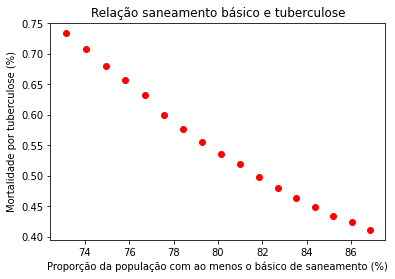

In [24]:
sanitation_data = pd.read_csv('../data/processed/sanitation_data.csv')
mortality_data = pd.read_csv('../data/processed/mortality_data.csv')

brazil_mortality = mortality_data.loc[(mortality_data['country'] == 'Brazil') & (mortality_data['year'] >= 2000)]
brazil_sanitation = sanitation_data.loc[(sanitation_data['country'] == 'Brazil') & (sanitation_data['INDICATOR'] == 'WS_PPL_S-ALB')]

y_data = brazil_mortality['Tuberculosis'].to_numpy()
x_data = brazil_sanitation['OBS_VALUE'].to_numpy()

plt.plot(x_data, y_data, 'ro')
plt.title('Relação saneamento básico e tuberculose')
plt.xlabel('Proporção da população com ao menos o básico de saneamento (%)')
plt.ylabel('Mortalidade por tuberculose (%)')
plt.show()


Representação gráfica da evolução do IDH de Moçlambique (país com maior aumento percentual nesse indicador)

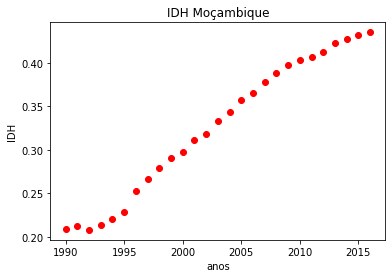

In [25]:
IDH_data = pd.read_csv('../data/processed/IDH_data.csv')

mozambique_data = IDH_data.loc[IDH_data['country'] == 'Mozambique']

x = mozambique_data['year'].to_numpy()
y = mozambique_data['HDI_VALUE'].to_numpy()

plt.plot(x, y, 'ro')
plt.title('IDH Moçambique')
plt.xlabel('anos')
plt.ylabel('IDH')
plt.show()

Por fim, geramos um gráfico de barras para facilitar a comparação de alguns dados de mortalidade (1990 e 2016) de Moçambique. Para entender se essa alteração no IDH surtiu efeito nos índices de mortalidade.

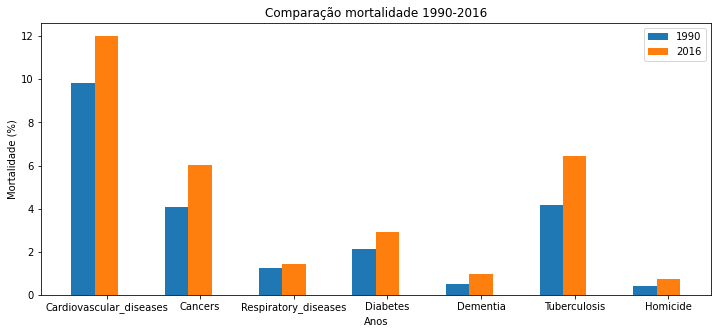

In [26]:
mortality_data = pd.read_csv('../data/processed/mortality_data.csv')

mozambique_data = mortality_data.loc[mortality_data['country'] == 'Mozambique']

diseases = ['Cardiovascular_diseases', 'Cancers', 'Respiratory_diseases', 'Diabetes', 'Dementia', 'Tuberculosis', 'Homicide']

data_1990 = mozambique_data.loc[mozambique_data['year'] == 1990]
data_2016 = mozambique_data.loc[mozambique_data['year'] == 2016]

y_1990 = []
y_2016 = []

for disease in diseases:
    y_1990.append(data_1990[disease].values[0])
    y_2016.append(data_2016[disease].values[0])

barWidth = 0.25

x1 = np.arange(len(y_1990))
x2 = [i + barWidth for i in x1]

plt.figure(figsize=(12, 5))
plt.bar(x1, y_1990, width=barWidth, label='1990')
plt.bar(x2, y_2016, width=barWidth, label='2016')

plt.title('Comparação mortalidade 1990-2016')
plt.xlabel('Anos')
plt.ylabel('Mortalidade (%)')
plt.xticks([r + barWidth for r in range(len(y_1990))], diseases)
plt.legend()
plt.show()
